In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [12]:
from tensorflow.keras.datasets import mnist

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
single_image = X_train[0]
single_image.shape

(28, 28)

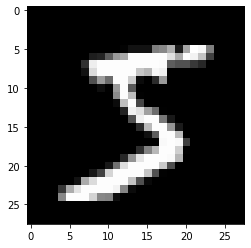

In [15]:
plt.imshow(single_image, cmap="gray")

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
# ONE HOT ENCODING THE LABELS
# THE NETWORK CAN NOW KNOW THAT IT IS A CLASSIFICATION PROBLEM
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [18]:
# NORMALIZING IMAGES
X_train = X_train/255
X_test = X_test/255

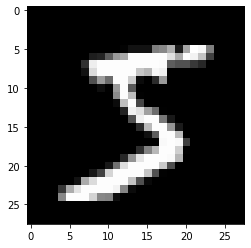

In [20]:
scaled_image = X_train[0]
plt.imshow(scaled_image, cmap="gray")

In [22]:
# ADDING THE CHANNELS TO THE INPUT
# batch_size, width, height, color_channels
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1),filters=32, kernel_size=(4,4), activation="relu")) # Initial conv layer
model.add(MaxPool2D(pool_size=(2,2))) # Pooling layer as half of the kernel size

model.add(Flatten()) # Flatten the image to 1D array of widthxheight size

model.add(Dense(128, activation="relu")) # Dense layer

# OUTPUT LAYER SOFTMAX -> MULTI CLASSIFICATION
model.add(Dense(10, activation="softmax")) # Output layer

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor="val_loss", patience=1)

In [30]:
model.fit(X_train, y_cat_train, epochs=10,validation_data=(X_test, y_cat_test), callbacks=[early_stop], batch_size=1)

Epoch 1/10
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0983 - accuracy: 0.9705 - val_loss: 0.0631 - val_accuracy: 0.9813
Epoch 2/10
60000/60000 [==============================] - 273s 5ms/step - loss: 0.0535 - accuracy: 0.9848 - val_loss: 0.0645 - val_accuracy: 0.9831


In [32]:
metrics = pd.DataFrame(model.history.history)

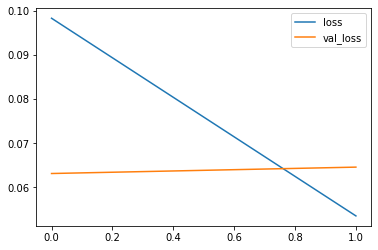

In [33]:
metrics[["loss", "val_loss"]].plot()

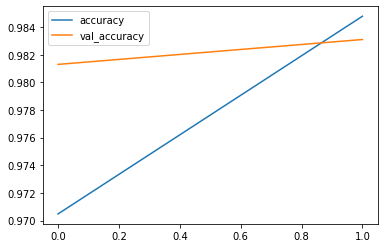

In [34]:
metrics[["accuracy", "val_accuracy"]].plot()

In [35]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.06451994925737381, 0.9830999970436096]

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [42]:
import seaborn as sns


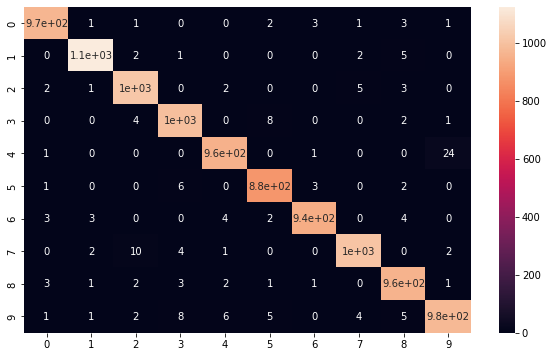

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

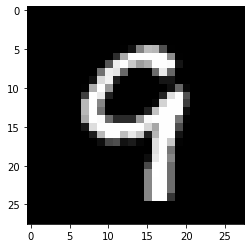

In [50]:
number = X_test[150]
plt.imshow(number.reshape(28,28), cmap="gray")

In [51]:
np.argmax(model.predict(number.reshape(1, 28, 28, 1)), axis=-1) # the output is an integer beacuse of the softmax activation

array([9])